In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X = np.load('/media/marsdenlab/Data2/datasets/DeepLofting/files/cabg11/aorta/159.X.npy')
print(X.shape)

(240, 240)


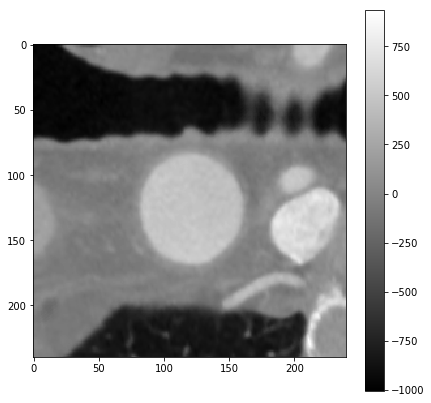

In [3]:
plt.figure(figsize=(7,7))
plt.imshow(X,cmap='gray')
plt.colorbar()
plt.show()

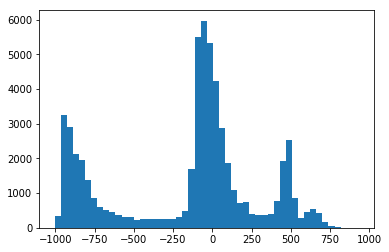

In [4]:
plt.hist(np.ravel(X),bins=50)
plt.show()

In [5]:
box_shape = [30,30]

x  = tf.placeholder(shape=[1]+list(X.shape)+[1], dtype=tf.float32)
b  = tf.placeholder(shape=[None,4], dtype=tf.float32)
bi = tf.placeholder(shape=[None], dtype=tf.int32)
o  = tf.image.crop_and_resize(x,b, box_ind=bi, crop_size=box_shape)

In [6]:
sess = tf.Session()

In [7]:
boxes = np.array([
    [0.25,0.25,0.5,0.5],
    [0.3,0.3,0.8,0.8],
    [0.8,0.6,0.2,0.9]
])

box_ind = [0,0,0]

out_images = sess.run(o, {x:X[np.newaxis,:,:,np.newaxis], b:boxes, bi:box_ind})

print(out_images.shape)

(3, 30, 30, 1)


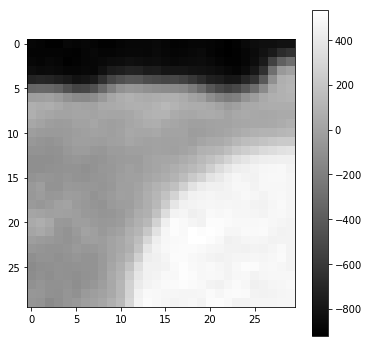

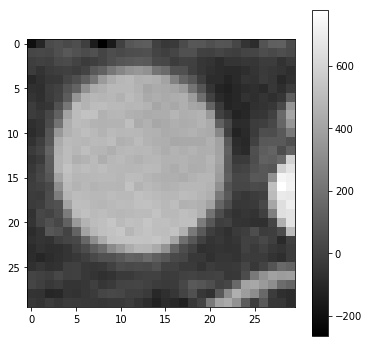

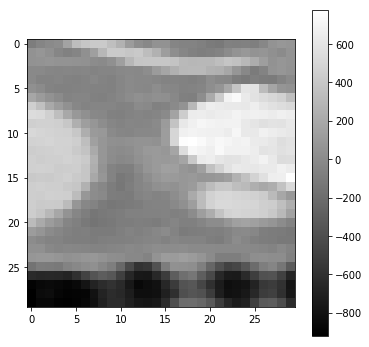

In [8]:
for i in range(len(boxes)):
    plt.figure(figsize=(6,6))
    plt.imshow(out_images[i,:,:,0], cmap='gray')
    plt.colorbar()
    plt.show()